In [7]:
"""
Created on: Fri. 14 Oct. 2022
Author: Mélina Verger

Compute the intersection area (and the IoU ratio) and the normalized Euclidean distance between the 2 kde estimates curves.
Data distribution comparison.
"""

# To load the trained models
import pickle

# For data manipulation
import pandas as pd
import numpy as np

# Plotting module
import seaborn as sns
import matplotlib.pyplot as plt

# To compute area between two curves
import similaritymeasures

In [ ]:
# Load the line2D from before ? or re-caulculate the kde it's probably better with scipy Gaussian kde

## Normalized Euclidian distance and areas

In [19]:
def euclidian_distance(vector1, vector2):
    x1 = vector1[:,0]
    y1 = vector1[:,1]

    x2 = vector2[:,0]
    y2 = vector2[:,1]

    dist_vect = np.sum((x2 - x1)**2 + (y2 - y1)**2)

    return np.sqrt(dist_vect)

In [20]:
coordinates1[-1, 0]

NameError: name 'coordinates1' is not defined

-----LogisticRegression(random_state=0)-----
similaritymeasures:
area.: 0.73
IoU.: 0.62
eucl.: 22.91


min and max:
area.: 0.85
IoU.: 0.72
norm. eucl.: 0.45
min maximal from coord1
max minimal from coord1
0.039716538064903606
1.1224293363437607
143
0.040809872126553126
857


ValueError: operands could not be broadcast together with shapes (1000,2) (857,2) 

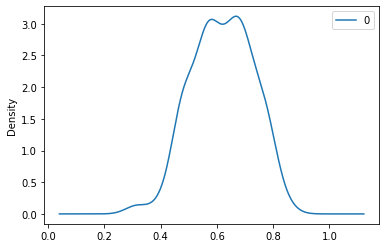

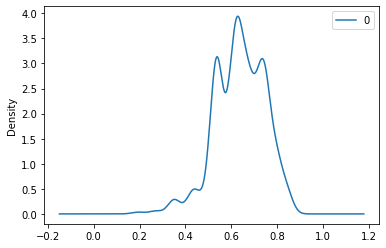

In [ ]:
# Gender

for model in models:

   print(f"-----{str(model)}-----", flush=True)
   # retrive curve objects
   line1 = pd.DataFrame(model.predict_proba(X_test_gender_1)[:, 1]).plot.kde()
   line2 = pd.DataFrame(model.predict_proba(X_test_gender_0)[:, 0]).plot.kde()

   # retrieve coordinates
   coordinates1 = line1.get_children()[0].get_path().vertices
   coordinates2 = line2.get_children()[0].get_path().vertices

   # area between curve 1 and curve 2 via their coordinates
   area = similaritymeasures.area_between_two_curves(coordinates1, coordinates2)

   # area of the union of the 2 curves (max. pt1 and pt2)
   coord_max = np.maximum(coordinates1, coordinates2) # element-wise
   xaxis = np.zeros((len(coord_max), 2))
   xaxis[:, 0] = np.linspace(0, 1, num=len(coord_max), endpoint=True)

   area_union = similaritymeasures.area_between_two_curves(coord_max, xaxis)

   print("similaritymeasures:", flush=True)
   print("area.:", round(area_union - area, 2), flush=True) # intersection area

   print("IoU.:", round((area_union - area)/area_union, 2), flush=True) # intersection area over union

   print("eucl.:", round(np.linalg.norm(coordinates2 - coordinates1), 2)) # euclidian distance with primitive function, same results no matter the ordi of the substraction

   normalized_coordinates1 = coordinates1/np.linalg.norm(coordinates1)
   normalized_coordinates2 = coordinates2/np.linalg.norm(coordinates2)
   
   

   print("\n", flush=True)
   print("min and max:", flush=True)
   intersection_curve = np.minimum(coordinates1, coordinates2)
   intersection_area = similaritymeasures.area_between_two_curves(intersection_curve, xaxis)
   print("area.:", round(intersection_area, 2), flush=True) # intersection area
   print("IoU.:", round(intersection_area/area_union, 2), flush=True) # ratio
   print("norm. eucl.:", round(euclidian_distance(normalized_coordinates1, normalized_coordinates2), 2))



   # reduction of study interval
   xmin = 0.0
   xmax = 0.0

   if coordinates1[0, 0] < coordinates2[0, 0]:
      xmin = coordinates2[0, 0]
      print("min maximal from coord2")
   else:
      xmin = coordinates1[0, 0]
      print("min maximal from coord1")
   
   if coordinates1[-1, 0] < coordinates2[-1, 0]:
      xmax = coordinates1[-1, 0]
      print("max minimal from coord1")
   else:
      xmax = coordinates2[-1, 0]
      print("max minimal from coord2")

   print(xmin)
   print(xmax)

   if xmin < xmax:

      coordinates1_red = coordinates1
      coordinates2_red = coordinates2
      reduced_xmin1 = False
      reduced_xmin2 = False
      reduced_xmax1 = False
      reduced_xmax2 = False

      for i in range(len(coordinates1)): # normally len(coordinates1) == len(cordinates2)
         # reduce from xmin
         if coordinates1[i, 0] >= xmin and not reduced_xmin1:
            coordinates1_red = coordinates1[i:, :]
            reduced_xmin1 = True
         if coordinates2[i, 0] >= xmin and not reduced_xmin2:
            coordinates2_red = coordinates2[i:, :]
            reduced_xmin2 = True
            print(i)
            print(coordinates2[i, 0])
            print(len(coordinates2_red))
         
         # reduce until xmax
         if coordinates1[i, 0] >= xmax and not reduced_xmax1:
            coordinates1_red = coordinates1_red[:i+1, :]
            reduced_xmax1 = True
         if coordinates2[i, 0] >= xmax and not reduced_xmax2:
            coordinates2_red = coordinates2_red[:i+1, :]
            reduced_xmax2 = True


      # area of the union of the 2 curves (max. pt1 and pt2)
      coord_max_red = np.maximum(coordinates1_red, coordinates2_red) # element-wise
      xaxis_red = np.zeros((len(coord_max_red), 2))
      xaxis_red[:, 0] = np.linspace(0, 1, num=len(coord_max_red), endpoint=True)

      area_union_red = similaritymeasures.area_between_two_curves(coord_max_red, xaxis_red)

      intersection_curve_red = np.minimum(coordinates1_red, coordinates2_red)
      intersection_area_red = similaritymeasures.area_between_two_curves(intersection_curve_red, xaxis_red)



   else: # meaning that the curves don't cross
      intersection_area_red = 0

   print(len(coordinates1_red) == len(coordinates2_red))

   normalized_coordinates1_red = coordinates1_red/np.linalg.norm(coordinates1_red)
   normalized_coordinates2_red = coordinates2_red/np.linalg.norm(coordinates2_red)

   print("\n", flush=True)
   print("min and max + reduction of interval:", flush=True)
   
   print("area.:", round(intersection_area_red, 2), flush=True) # intersection area
   print("IoU.:", round(intersection_area_red/area_union_red, 2), flush=True) # ratio
   print("norm. eucl.:", round(euclidian_distance(normalized_coordinates1_red, normalized_coordinates2_red), 2))
   

   

----------
similaritymeasures:
-0.2
-0.1
0.32
min and max:
0.97
0.49
28.54
----------
similaritymeasures:
0.37
0.24
0.71
min and max:
0.67
0.43
26.48
----------
similaritymeasures:
0.63
0.44
0.59
min and max:
0.68
0.48
23.6
----------
similaritymeasures:
0.63
0.44
0.63
min and max:
0.62
0.44
26.43


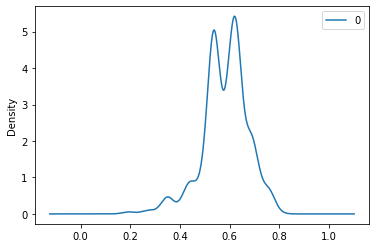

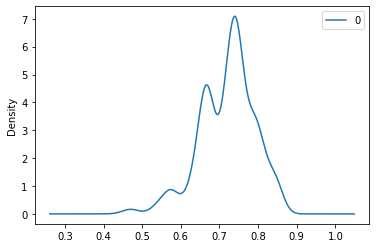

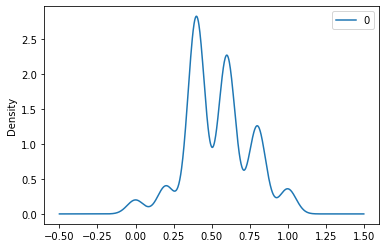

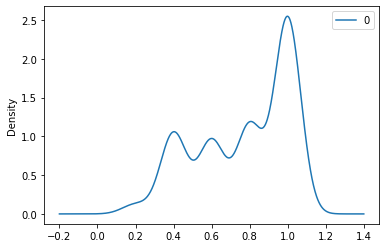

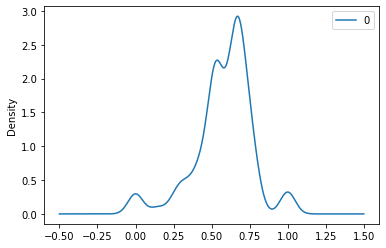

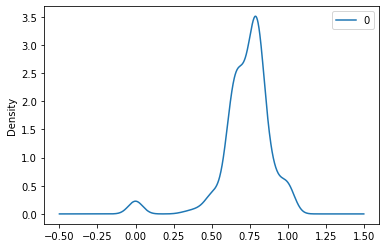

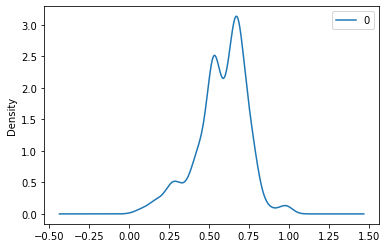

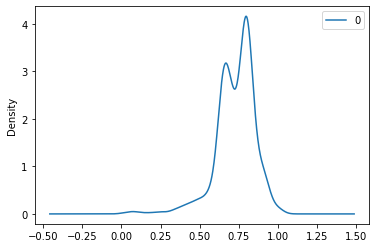

In [ ]:
# Imd band

for model in models:

   print("----------", flush=True)
   # retrive curve objects
   line1 = pd.DataFrame(model.predict_proba(X_test_imdband_1)[:, 1]).plot.kde()
   line2 = pd.DataFrame(model.predict_proba(X_test_imdband_0)[:, 1]).plot.kde()

   # retrieve coordinates
   coordinates1 = line1.get_children()[0].get_path().vertices
   coordinates2 = line2.get_children()[0].get_path().vertices

   # area between curve 1 and curve 2 via their coordinates
   area = similaritymeasures.area_between_two_curves(coordinates1, coordinates2)

   # area of the union of the 2 curves (max. pt1 and pt2)
   coord_max = np.maximum(coordinates1, coordinates2) # element-wise
   xaxis = np.zeros((len(coord_max), 2))
   xaxis[:, 0] = np.linspace(0, 1, num=len(coord_max), endpoint=True)

   area_union = similaritymeasures.area_between_two_curves(coord_max, xaxis)

   print("similaritymeasures:", flush=True)
   print(round(area_union - area, 2), flush=True) # intersection area

   print(round((area_union - area)/area_union, 2), flush=True) # intersection area over union

   normalized_coordinates1 = coordinates1/np.linalg.norm(coordinates1)
   normalized_coordinates2 = coordinates2/np.linalg.norm(coordinates2)
   print(round(euclidian_distance(normalized_coordinates1, normalized_coordinates2), 2))
   


   print("min and max:", flush=True)
   intersection_curve = np.minimum(coordinates1, coordinates2)
   intersection_area = similaritymeasures.area_between_two_curves(intersection_curve, xaxis)
   print(round(intersection_area, 2), flush=True) # intersection area
   print(round(intersection_area/area_union, 2), flush=True) # ratio
   print(round(np.linalg.norm(coordinates2 - coordinates1), 2)) # euclidian distance with primitive function, same results no matter the ordi of the substraction

----------
similaritymeasures:
0.59
0.47
0.63
min and max:
0.7
0.55
33.38
----------
similaritymeasures:
0.79
0.61
0.41
min and max:
0.78
0.6
14.01
----------
similaritymeasures:
0.75
0.59
0.31
min and max:
0.77
0.62
12.46
----------
similaritymeasures:
0.81
0.69
0.31
min and max:
0.81
0.69
12.15


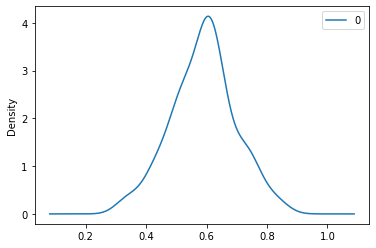

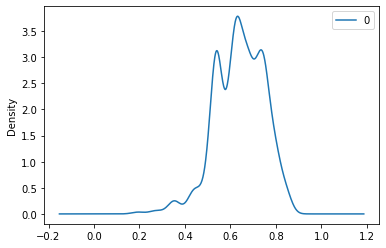

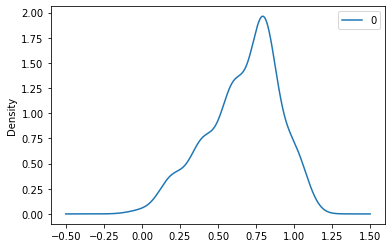

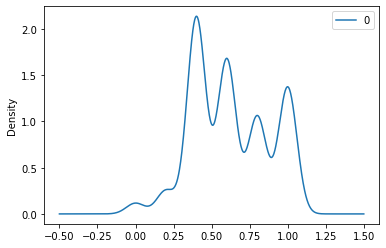

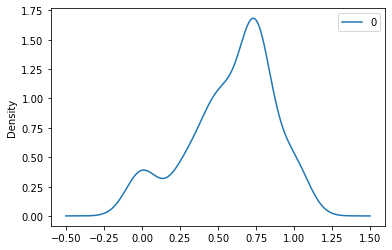

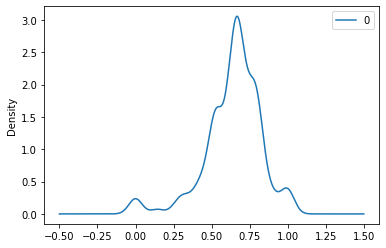

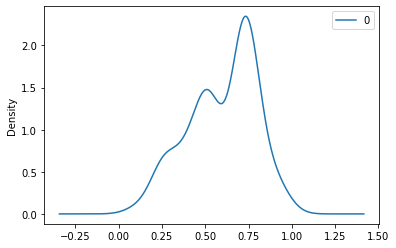

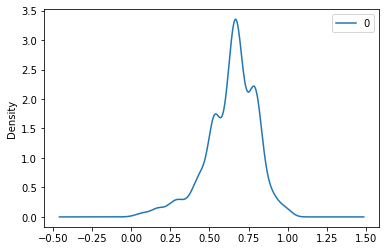

In [ ]:
# Disability

for model in models:

   print("----------", flush=True)
   # retrive curve objects
   line1 = pd.DataFrame(model.predict_proba(X_test_disability_1)[:, 1]).plot.kde()
   line2 = pd.DataFrame(model.predict_proba(X_test_disability_0)[:, 1]).plot.kde()

   # retrieve coordinates
   coordinates1 = line1.get_children()[0].get_path().vertices
   coordinates2 = line2.get_children()[0].get_path().vertices

   # area between curve 1 and curve 2 via their coordinates
   area = similaritymeasures.area_between_two_curves(coordinates1, coordinates2)

   # area of the union of the 2 curves (max. pt1 and pt2)
   coord_max = np.maximum(coordinates1, coordinates2) # element-wise
   xaxis = np.zeros((len(coord_max), 2))
   xaxis[:, 0] = np.linspace(0, 1, num=len(coord_max), endpoint=True)

   area_union = similaritymeasures.area_between_two_curves(coord_max, xaxis)

   print("similaritymeasures:", flush=True)
   print(round(area_union - area, 2), flush=True) # intersection area

   print(round((area_union - area)/area_union, 2), flush=True) # intersection area over union

   normalized_coordinates1 = coordinates1/np.linalg.norm(coordinates1)
   normalized_coordinates2 = coordinates2/np.linalg.norm(coordinates2)
   print(round(euclidian_distance(normalized_coordinates1, normalized_coordinates2), 2))
   


   print("min and max:", flush=True)
   intersection_curve = np.minimum(coordinates1, coordinates2)
   intersection_area = similaritymeasures.area_between_two_curves(intersection_curve, xaxis)
   print(round(intersection_area, 2), flush=True) # intersection area
   print(round(intersection_area/area_union, 2), flush=True) # ratio
   print(round(np.linalg.norm(coordinates2 - coordinates1), 2)) # euclidian distance with primitive function, same results no matter the ordi of the substraction

In [ ]:
#x1, y1 = np.split(coordinates1, 2, 1)
#x2, y2 = np.split(coordinates2, 2, 1)

## Safety check

In [ ]:
mu1, sigma1 = 0, 0.1 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, (1000, 2))

In [ ]:
mu2, sigma2 = 0.5, 0.1 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, (1000, 2))

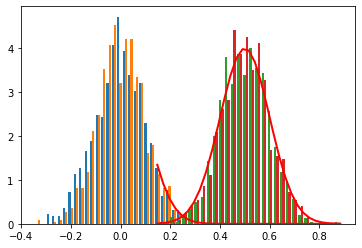

In [ ]:
count, bins, ignored = plt.hist(s1, 30, density=True)
count, bins, ignored = plt.hist(s2, 30, density=True)
plt.plot(bins, 1/(sigma1 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu1)**2 / (2 * sigma1**2) ),
         linewidth=2, color='r')
plt.plot(bins, 1/(sigma2 * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu2)**2 / (2 * sigma2**2) ),
    linewidth=2, color='r')

In [ ]:
print(similaritymeasures.area_between_two_curves(s1, s2)) # 0.1

19.62169839299725


In [ ]:
print(similaritymeasures.area_between_two_curves(s2, s1)) # 0.5

74.77574177879997


In [ ]:
print(similaritymeasures.area_between_two_curves(s2, s1)) # 0.8

120.68140048177823


In [ ]:
print(similaritymeasures.area_between_two_curves(s1, s1)) 

0.0
